# Diabetes Modeling on Pycaret

**A test-run**

*A. Vera*


## Overview

The following exercise serves as an exploration of the PyCaret package in Python and how it can be used to speed-up the Machine Learning experimentation process.  The data used in this example is already included in the package and will be used to build a ML model to classify/predict the onset of diabetes in females of age 21+.  The data is originally from the National Institute of Diabetes and Kidney Diseases.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#Read the Data
from pycaret.datasets import get_data
df = get_data('diabetes')
df.info()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Number of times pregnant                                                  768 non-null    int64  
 1   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  768 non-null    int64  
 2   Diastolic blood pressure (mm Hg)                                          768 non-null    int64  
 3   Triceps skin fold thickness (mm)                                          768 non-null    int64  
 4   2-Hour serum insulin (mu U/ml)                                            768 non-null    int64  
 5   Body mass index (weight in kg/(height in m)^2)                            768 non-null    float64
 6   Diabetes pedigree function                                         

In [3]:
# Change column names

df = df.rename(columns={'Number of times pregnant':'times_pregnant',
                        'Plasma glucose concentration a 2 hours in an oral glucose tolerance test':'glucose',
                        'Diastolic blood pressure (mm Hg)':'diastolic',
                        'Triceps skin fold thickness (mm)':'thickness',
                        '2-Hour serum insulin (mu U/ml)':'insulin',
                        'Body mass index (weight in kg/(height in m)^2)':'bmi',
                        'Diabetes pedigree function':'pedigree',
                        'Age (years)':'age',
                        'Class variable':'diabetes'})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   times_pregnant  768 non-null    int64  
 1   glucose         768 non-null    int64  
 2   diastolic       768 non-null    int64  
 3   thickness       768 non-null    int64  
 4   insulin         768 non-null    int64  
 5   bmi             768 non-null    float64
 6   pedigree        768 non-null    float64
 7   age             768 non-null    int64  
 8   diabetes        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Changing 'diabetes' as Yes and No

df['diabetes'] = np.where(df['diabetes'] == 1, 'Yes', 'No')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   times_pregnant  768 non-null    int64  
 1   glucose         768 non-null    int64  
 2   diastolic       768 non-null    int64  
 3   thickness       768 non-null    int64  
 4   insulin         768 non-null    int64  
 5   bmi             768 non-null    float64
 6   pedigree        768 non-null    float64
 7   age             768 non-null    int64  
 8   diabetes        768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [5]:
df.diabetes.value_counts()

No     500
Yes    268
Name: diabetes, dtype: int64

In [7]:
df.times_pregnant

0       6
1       1
2       8
3       1
4       0
       ..
763    10
764     2
765     5
766     1
767     1
Name: times_pregnant, Length: 768, dtype: int64

In [9]:
#Setting up the Environment
from pycaret.classification import *

exp_class = setup(df,target='diabetes', remove_multicollinearity=True, multicollinearity_threshold=0.70, numeric_features=['times_pregnant'], normalize=True, normalize_method='zscore')

,Description,Value
0,session_id,5849
1,Target,diabetes
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(768, 9)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [13]:
# Comparing models

best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7655,0.8093,0.5430,0.7013,0.6091,0.4477,0.4560,0.7680
lda,Linear Discriminant Analysis,0.7637,0.8088,0.5427,0.6980,0.6066,0.4438,0.4525,0.0040
ridge,Ridge Classifier,0.7618,0.0000,0.5269,0.7007,0.5986,0.4363,0.4461,0.0040
rf,Random Forest Classifier,0.7617,0.8145,0.5585,0.6952,0.6096,0.4442,0.4550,0.0650
gbc,Gradient Boosting Classifier,0.7561,0.8268,0.5804,0.6811,0.6203,0.4433,0.4508,0.0260
ada,Ada Boost Classifier,0.7488,0.8056,0.5956,0.6508,0.6196,0.4328,0.4355,0.0220
lightgbm,Light Gradient Boosting Machine,0.7411,0.7898,0.5740,0.6376,0.5989,0.4100,0.4145,0.1620
nb,Naive Bayes,0.7396,0.8011,0.5646,0.6397,0.5962,0.4062,0.4101,0.0040
xgboost,Extreme Gradient Boosting,0.7374,0.7747,0.5740,0.6263,0.5943,0.4026,0.4058,0.1130
qda,Quadratic Discriminant Analysis,0.7356,0.8013,0.5257,0.6518,0.5761,0.3883,0.3967,0.0050


In [14]:
exp_class_2 = setup(df,target='diabetes', remove_multicollinearity=True, multicollinearity_threshold=0.70, numeric_features=['times_pregnant'], 
                    fix_imbalance =  True, normalize=True, normalize_method='zscore')

,Description,Value
0,session_id,884
1,Target,diabetes
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(768, 9)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


As expeced, Logistic Regression provided the best accuracy measures.  Nonetheless, we can try improving these by upsampling the data and fixing the class imbalance.  Let's give it a try.

In [16]:
best2 = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7744,0.8334,0.6511,0.7181,0.6762,0.5050,0.5118,0.0590
ada,Ada Boost Classifier,0.7636,0.8197,0.7032,0.6668,0.6823,0.4946,0.4972,0.0250
catboost,CatBoost Classifier,0.7614,0.8292,0.6913,0.6696,0.6772,0.4885,0.4916,0.7550
lr,Logistic Regression,0.7599,0.8292,0.7174,0.6561,0.6804,0.4895,0.4958,0.7240
rf,Random Forest Classifier,0.7578,0.8226,0.6661,0.6711,0.6634,0.4754,0.4796,0.0690
ridge,Ridge Classifier,0.7542,0.0000,0.7171,0.6485,0.6761,0.4798,0.4863,0.0050
lda,Linear Discriminant Analysis,0.7542,0.8280,0.7171,0.6485,0.6761,0.4798,0.4863,0.0050
nb,Naive Bayes,0.7522,0.8196,0.6921,0.6574,0.6693,0.4728,0.4777,0.0060
xgboost,Extreme Gradient Boosting,0.7466,0.7992,0.6663,0.6542,0.6551,0.4559,0.4602,0.1320
lightgbm,Light Gradient Boosting Machine,0.7464,0.7984,0.6555,0.6534,0.6515,0.4528,0.4553,0.1790


See how the accuracy metrics changed a little.  Let's use `Extra Trees Classifier` as our ML model.

In [17]:
xtra = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7593,0.8278,0.7368,0.6364,0.6829,0.4906,0.4940
1,0.7593,0.8609,0.5789,0.6875,0.6286,0.4524,0.4561
2,0.7778,0.8500,0.5000,0.8333,0.6250,0.4808,0.5125
3,0.7963,0.8243,0.6500,0.7647,0.7027,0.5493,0.5535
4,0.8519,0.8471,0.7000,0.8750,0.7778,0.6687,0.6781
5,0.8333,0.9096,0.7500,0.7895,0.7692,0.6389,0.6394
6,0.8148,0.8618,0.7000,0.7778,0.7368,0.5946,0.5966
7,0.7358,0.8057,0.6316,0.6316,0.6316,0.4257,0.4257
8,0.6981,0.7593,0.7368,0.5600,0.6364,0.3864,0.3971
9,0.7170,0.7879,0.5263,0.6250,0.5714,0.3625,0.3655


In [18]:
evaluate_model(xtra)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

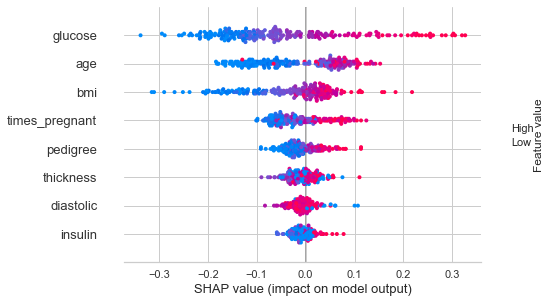

In [20]:
# Interpreting the Model
interpret_model(xtra)

In [21]:
# Making predictions on the holdout dataset
pred_holdout = predict_model(xtra)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.7619,0.7968,0.6027,0.6286,0.6154,0.4431,0.4433


In [22]:
# Finalize Model

final_xtra = finalize_model(xtra)

In [16]:
final_lgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=8221, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

Now that the model is "finalized", it can be saved as a `pkl` file for *deployment*.  This is accomplished by the following line of code.

In [23]:
# Saving the Model
save_model(final_xtra, 'Final_Model_xtra_tree')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['times_pregnant'],
                                       target='diabetes', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
       

In [24]:
pred_holdout.columns

Index(['times_pregnant', 'glucose', 'diastolic', 'thickness', 'insulin', 'bmi',
       'pedigree', 'age', 'diabetes', 'Label', 'Score'],
      dtype='object')

## Conclusion

`PyCaret` provides a set of wrapper functions around common ML libraries in Python to speed-up the experimentation process in the creation of ML models.  It offers a nice, easy-to-use approach to automate most of the time-consuming (yet necessary) tasks in ML experimentation.

As you can see in this example, we were able to automate most of these processes and get to choose our final model and finalize it.  It is just ready for deployment.

**NOTE:** The presented model can use more fine-tuning.  The purpose of this exercise is just to showcase the capabilities of the PyCaret library.